# Mall Customers
## notebook


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import sklearn.preprocessing

import wrangle_mall

1. Acquire data from mall_customers.customers in mysql database.


In [2]:
df = wrangle_mall.acquire_mall()

In [3]:
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


2. Summarize data (include distributions and descriptive statistics).


In [4]:
df.shape
# 200 rows, 5 columns

(200, 5)

In [5]:
df.describe()

,customer_id,age,annual_income,spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


- df.describe() takeaways:
    - `age`
        - the average age i sabout 39 years old
        - youngest customer is 18 while the older is 70
            - big age gap
        - q1 = 28.75
        - q3 = 49
        - iqr would then be 
            - (49) - (28.75)
    - `annual_income`
        - on average is about 61
        - lowest is 15 while highest is 137
        - q1 = 41.5
        - q3 = 78
        - iqr would then be 
            - (41.5) - (78)
    - `spending_score`
        - average of about 50
        - min is 1 while make is 99
        - q1 = 34.75
        - q3 = 73
        - iqr would then be 
            - (34.75) - (73)

In [6]:
df.info()
# there does not seem to be any null values at all
# gender is an object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.gender.value_counts()
#no blanks

Female    112
Male       88
Name: gender, dtype: int64

In [8]:
df.age.value_counts()
# no blanks

32    11
35     9
19     8
31     8
30     7
49     7
27     6
47     6
40     6
23     6
36     6
38     6
50     5
48     5
29     5
21     5
20     5
34     5
18     4
28     4
59     4
24     4
67     4
54     4
39     3
25     3
33     3
22     3
37     3
43     3
68     3
45     3
46     3
60     3
41     2
57     2
66     2
65     2
63     2
58     2
26     2
70     2
42     2
53     2
52     2
51     2
44     2
55     1
64     1
69     1
56     1
Name: age, dtype: int64

In [9]:
df.annual_income.value_counts()
# no blanks

54     12
78     12
60      6
87      6
62      6
       ..
61      2
126     2
59      2
58      2
15      2
Name: annual_income, Length: 64, dtype: int64

In [10]:
df.spending_score.value_counts()
# no blanks

42    8
55    7
46    6
73    6
35    5
     ..
31    1
82    1
24    1
23    1
99    1
Name: spending_score, Length: 84, dtype: int64

<AxesSubplot:ylabel='Count'>

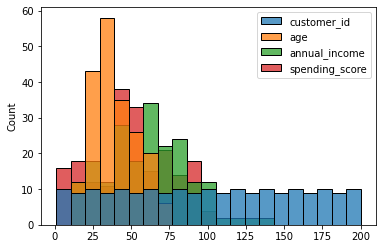

In [11]:
sns.histplot(data=df)

<AxesSubplot:>

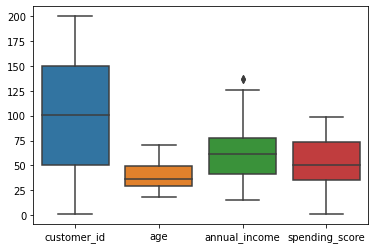

In [12]:
sns.boxplot(data=df)
# annual income has outlier

3. Detect outliers using IQR.


### Age IQR

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Age Boxplot'}, xlabel='age'>

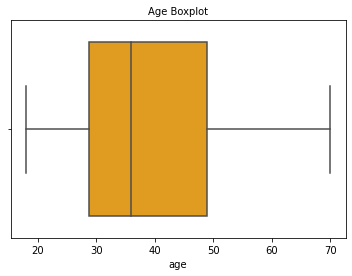

In [13]:
plt.title("Age Boxplot", size=10, color='black')
sns.boxplot(df.age, color='orange')

In [14]:
# Let's use IQR for the entire dataset
q1 = df.age.quantile(.25)
q3 = df.age.quantile(.75)
iqr = q3 - q1

# IQR has a parameter that is a 'multiplier'
multiplier = 1.5
upper_bound = q3 + (multiplier * iqr)
lower_bound = q1 - (multiplier * iqr)

print(f'q1 = :', q1) 
print(f'q3 = :', q3)
print(f'IQR = :', iqr)
print('-------------------------------')
print(f'Upper Bound = :', upper_bound) 
print(f'Lower Bound = :', lower_bound) 

q1 = : 28.75
q3 = : 49.0
IQR = : 20.25
-------------------------------
Upper Bound = : 79.375
Lower Bound = : -1.625


### Annual Income IQR

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Annual Income Boxplot'}, xlabel='annual_income'>

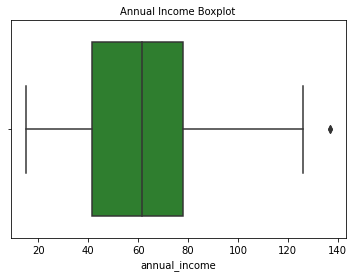

In [15]:
plt.title("Annual Income Boxplot", size=10, color='black')
sns.boxplot(df.annual_income, color='forestgreen')

In [16]:
# Let's use IQR for the entire dataset
q1 = df.annual_income.quantile(.25)
q3 = df.annual_income.quantile(.75)
iqr = q3 - q1

# IQR has a parameter that is a 'multiplier'
multiplier = 1.5
upper_bound = q3 + (multiplier * iqr)
lower_bound = q1 - (multiplier * iqr)

print(f'q1 = :', q1) 
print(f'q3 = :', q3)
print(f'IQR = :', iqr)
print('-------------------------------')
print(f'Upper Bound = :', upper_bound) 
print(f'Lower Bound = :', lower_bound) 

q1 = : 41.5
q3 = : 78.0
IQR = : 36.5
-------------------------------
Upper Bound = : 132.75
Lower Bound = : -13.25


### Spending Score IQR

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Spending Score Boxplot'}, xlabel='spending_score'>

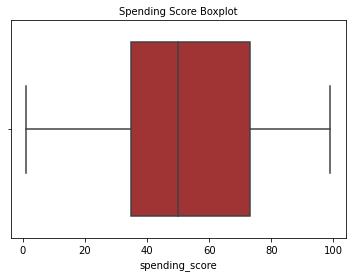

In [17]:
plt.title("Spending Score Boxplot", size=10, color='black')
sns.boxplot(df.spending_score, color='firebrick')

In [18]:
# Let's use IQR for the entire dataset
q1 = df.spending_score.quantile(.25)
q3 = df.spending_score.quantile(.75)
iqr = q3 - q1

# IQR has a parameter that is a 'multiplier'
multiplier = 1.5
upper_bound = q3 + (multiplier * iqr)
lower_bound = q1 - (multiplier * iqr)

print(f'q1 = :', q1) 
print(f'q3 = :', q3)
print(f'IQR = :', iqr)
print('-------------------------------')
print(f'Upper Bound = :', upper_bound) 
print(f'Lower Bound = :', lower_bound) 

q1 = : 34.75
q3 = : 73.0
IQR = : 38.25
-------------------------------
Upper Bound = : 130.375
Lower Bound = : -22.625


5. ncode categorical columns using a one hot encoder (pd.get_dummies).


In [19]:
dummy_df = pd.get_dummies(df[["gender"]], drop_first=False)
dummy_df

,gender_Female,gender_Male
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
195,1,0
196,1,0
197,0,1
198,0,1


In [20]:
df = pd.concat([df, dummy_df], axis=1)

In [21]:
df = df.drop(["gender"], axis=1)

In [22]:
df.head()

,customer_id,age,annual_income,spending_score,gender_Female,gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


4. Split data (train, validate, and test split).


In [23]:
train, test = train_test_split(df, test_size=.2, random_state=1234)
train, validate = train_test_split(train, test_size=.3, 
                                       random_state=1234)

In [24]:
train.head()

,customer_id,age,annual_income,spending_score,gender_Female,gender_Male
174,175,52,88,13,1,0
50,51,49,42,52,1,0
64,65,63,48,51,0,1
130,131,47,71,9,0,1
109,110,66,63,48,0,1


6. Handles missing values.


7. Scaling

In [25]:
# Make the thing
scaler = sklearn.preprocessing.MinMaxScaler()
# fit the thing
scaler.fit(train)
# tun them
train_scaled = scaler.transform(train)
validate_scaled = scaler.transform(validate)
test_scaled = scaler.transform(test)
# hey pandas make them into dataframes
train_scaled = pd.DataFrame(train_scaled, columns=train.columns)
validate_scaled = pd.DataFrame(validate_scaled, columns=train.columns)

In [26]:
train_scaled

,customer_id,age,annual_income,spending_score,gender_Female,gender_Male
0,0.874372,0.653846,0.598361,0.123711,1.0,0.0
1,0.251256,0.596154,0.221311,0.525773,1.0,0.0
2,0.321608,0.865385,0.270492,0.515464,0.0,1.0
3,0.653266,0.557692,0.459016,0.082474,0.0,1.0
4,0.547739,0.923077,0.393443,0.484536,0.0,1.0
...,...,...,...,...,...,...
107,0.115578,0.250000,0.081967,0.742268,0.0,1.0
108,0.984925,0.519231,0.909836,0.278351,1.0,0.0
109,0.110553,0.538462,0.081967,0.041237,1.0,0.0
110,0.924623,0.442308,0.688525,0.391753,1.0,0.0



## wrangle_mall.py


1. Acquire data from mall_customers.customers in mysql database.


```def acquire_mall():
    '''
    Grab data from Codeup SQL server
    '''
    sql_query = ''' select *
    from customers
    '''
    # make the connection to codeup sequel server
    connection = f'mysql+pymysql://{user}:{password}@{host}/mall_customers'
    # Assign the df
    df = pd.read_sql(sql_query, connection)
    return df```

In [27]:
df = wrangle_mall.acquire_mall()
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


3. One-hot-encoding (pd.get_dummies)


`def mall_dummies(df):
    '''This funciton takes in a df
    takes the gender column and encodes it
    merges the dummy with the df
    drops the original gender column
    returns df'''
    # split the gender column
    dummy_df = pd.get_dummies(df[["gender"]], drop_first=False)
    # merge dummy and df
    df = pd.concat([df, dummy_df], axis=1)
    # drop gender
    df = df.drop(["gender"], axis=1)
    return df`

In [28]:
df = wrangle_mall.mall_dummies(df)
df.head()

,customer_id,age,annual_income,spending_score,gender_Female,gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


4. Missing values


`There are no missing values`

2. Split the data into train, validate, and split


`def split_mall(df):
    '''This fuction takes in a df 
    splits into train, test, validate
    return: three pandas dataframes: train, validate, test
    '''
    # get df from focused_zillow function
    df = focused_zillow(df)
    # split the focused zillow data
    train_validate, test = train_test_split(df, test_size=.2, random_state=1234)
    train, validate = train_test_split(train_validate, test_size=.3, 
                                       random_state=1234)
    return train, validate, test`

In [29]:
train, validate, test = wrangle_mall.split_mall(df)
train.head()

,customer_id,age,annual_income,spending_score,gender_Female,gender_Male
174,175,52,88,13,1,0
50,51,49,42,52,1,0
64,65,63,48,51,0,1
130,131,47,71,9,0,1
109,110,66,63,48,0,1


5. Scaling

`def scale_mall(train, validate, test):
    '''this function takes in train, validate, and test
    create a scaler
    fit scaler
    create train_scaled, validate_scaled, and test_scaled
    and turn each of them into data frames
    returns train_scaled, validate_scaled, test_scaled
    '''
    # Make the thing
    scaler = sklearn.preprocessing.MinMaxScaler()
    # fit the thing
    scaler.fit(train)
    # tun them
    train_scaled = scaler.transform(train)
    validate_scaled = scaler.transform(validate)
    test_scaled = scaler.transform(test)
    # hey pandas make them into dataframes
    train_scaled = pd.DataFrame(train_scaled, columns=train.columns)
    validate_scaled = pd.DataFrame(validate_scaled, columns=train.columns)
    test_scaled = pd.DataFrame(test_scaled, columns=train.columns)
    # return them
    return train_scaled, validate_scaled, test_scaled`

In [31]:
train_scaled, validate_scaled, test_scaled = wrangle_mall.scale_mall(train, validate, test)
train.head()

,customer_id,age,annual_income,spending_score,gender_Female,gender_Male
174,175,52,88,13,1,0
50,51,49,42,52,1,0
64,65,63,48,51,0,1
130,131,47,71,9,0,1
109,110,66,63,48,0,1
